# Lecture 4


## Imports


In [1]:
import numpy as np
import pandas as pd

In [9]:
# File location windows
folder = "C:/Users/Dylan/Documents/Spring 2021/STA 208/DavisSML/data/"
filename = folder + "data_akbilgic.xlsx"

tse = pd.read_excel(filename, skiprows=1, engine="openpyxl")
tse.rename(columns={"ISE":"TLISE", "ISE.1":"USDISE"}, inplace=True)
tse.head()

,date,TLISE,USDISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


<AxesSubplot:xlabel='date'>

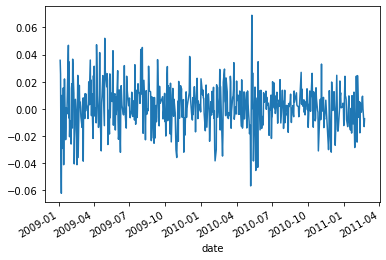

In [10]:
tse = tse.set_index("date")
tse["TLISE"].plot()

## Extract Volitility

In [11]:
tse_trem = tse - tse.rolling("7D").mean()
tse_vol = tse_trem**2

<AxesSubplot:xlabel='date'>

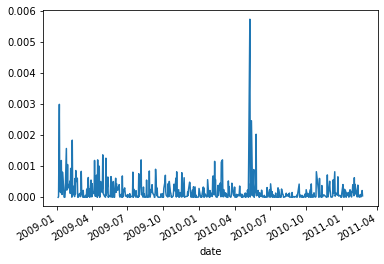

In [13]:
# Plot the volitility of TLISE
tse_vol["TLISE"].plot()

In [14]:
T,p = tse.shape

In [15]:
def const_wave(T,a,b):
    """build a single wavelet from a to b in a T vector"""
    wave = np.zeros(T)
    s1 = (b-a) // 2
    s2 = (b-a) - s1
    norm_C = (s1*s2 / (s1+s2))**0.5
    wave[a:a+s1] = norm_C / s1
    wave[a+s1:b] = -norm_C / s2
    return wave

In [17]:
def _const_wave_basis(T,a,b):
    """build the Haar wavelet basis of mother wavelets"""
    if b-a < 2:
        return []
    wave_basis = []
    wave_basis.append(const_wave(T,a,b))
    mid_pt = a + (b-a)//2
    wave_basis += _const_wave_basis(T,a,mid_pt)
    wave_basis += _const_wave_basis(T,mid_pt,b)
    return wave_basis

In [18]:
def const_wave_basis(T,a,b):
    """build the Haar wavelet basis of father wavelets"""
    father = np.ones(T) / T**0.5
    return [father] + _const_wave_basis(T,a,b)

In [19]:
# Construct discrete Haar wavelet basis
wave_basis = const_wave_basis(T,0,T)
W = np.array(wave_basis).T
W.shape

(536, 536)

In [20]:
def soft(y,lamb):
    """soft thresholding"""
    pos_part = (y - lamb) * (y > lamb)
    neg_part = (y + lamb) * (y < -lamb)
    return pos_part + neg_part

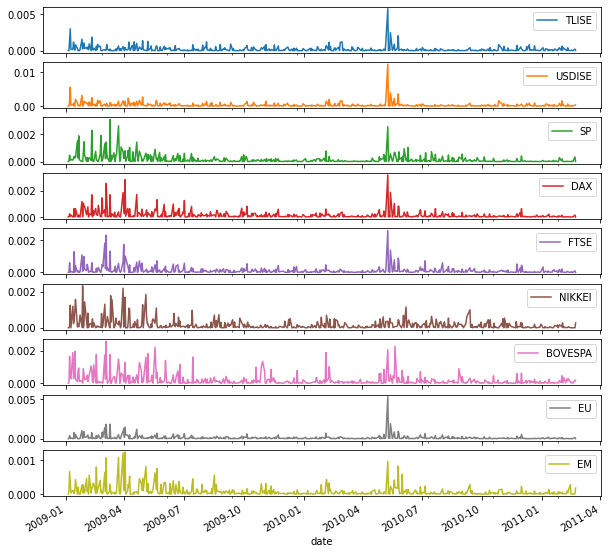

In [22]:
_ = tse_vol.plot(subplots=True, figsize=(10,10))

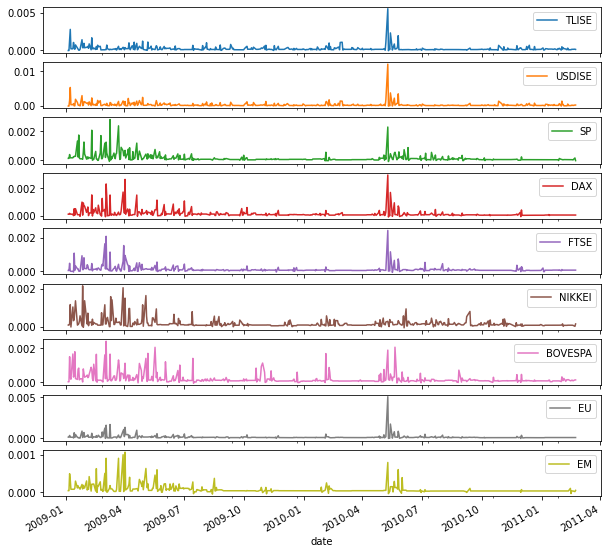

In [24]:
tse_wave = W.T @ tse_vol.values
lamb = 0.0001
tse_soft = soft(tse_wave, lamb)
tse_rec = W @ tse_soft
tse_den = tse_vol.copy()
tse_den.iloc[:, :] = tse_rec
_ = tse_den.plot(subplots=True, figsize=(10,10))